In [11]:
#!pip install dataframe-image

In [12]:
%matplotlib inline

#-----------------------------------------------------------
import os
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm        # module palettes de couleurs
import pandas as pd
import dataframe_image as dfi
import seaborn as sns
from sklearn.decomposition import PCA
#-----------------------------------------------------------
#np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth = 220)
np.set_printoptions(precision=4)
#np.set_printoptions(precision=3,formatter={'float': '{:9.3f}'.format})
pd.set_option('precision', 5)
pd.set_option("display.max_columns",20)
pd.set_option('display.max_rows', 999)
#pd.set_option('max_colwidth', 6)


## Chargement des données

Regardons d'abord les 2 bases de données que l'on a à disposition :


*   *'global_data'* : base de données composée de 9000 relevés pour lesquels la concentration en 10 types de pigments a été mesurée
*   *'tara_data'* : base de données de 211 relevés pour lesquels les mêmes concentrations sont mesurées, auxquelles s'ajoutent le pourcentage de 7 groupe de phytoplanctons dans l'échantillon.






In [13]:
# 9000 lignes x 10 pigments
# global_data = pd.read_excel('Data_Etude_de_Cas.xlsx',sheet_name='Global HPLC Data')
df_global_data = pd.read_excel('Data_Etude_de_Cas.xlsx',sheet_name='Global HPLC Data',usecols = 'F:O') #global data sans les colonnes dates

# 210 lignes x (10 pigments + 7 % de phytoplanctons)
df_tara_data = pd.read_excel('Data_Etude_de_Cas.xlsx',sheet_name='Tara Data Phyto + HPLC',usecols = 'G:W')


In [14]:
df_global_data.head()

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,0.482,0.055,0.059,NaN,0.085,0.016,0.029,0.017,0.007,0.188
1,1.248,0.000,0.277,NaN,0.248,0.061,0.332,0.064,0.106,0.039
2,1.517,0.000,0.206,NaN,0.234,0.065,0.636,0.056,0.207,0.030
3,3.363,0.000,0.000,NaN,0.137,0.035,2.057,0.085,0.000,0.048
4,1.325,0.000,0.192,NaN,0.288,0.053,0.336,0.152,0.032,0.174


In [15]:
df_tara_data.head()

,Diatoms,Coccolithophores (Haptophytes),Dinoflagellates,Prochlorococcus,Synechococcus,chlorophytes,other_Haptophytes,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.00378,0.01410,0.02332,0.68080,0.15722,0.03385,0.03577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.01393,0.01678,0.03135,0.19303,0.43812,0.04704,0.12771,0.42017,0.00126,0.03323,0.0,0.02532,0.00388,0.12139,0.0,0.00154,0.00696


# 1. **Etude unidimensionnelle**

## 1.1. Grande base de données *global_data*

### Caractéristiques unidimensionnelles

In [16]:
df_global_data.describe()

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,9484.00000,3945.00000,8242.00000,2312.00000,9442.00000,9295.00000,9269.00000,8500.00000,8088.00000,8520.00000
mean,1.54416,0.03178,0.05721,0.00295,0.18065,0.04242,0.85459,0.07378,0.06015,0.05247
std,3.68796,0.08862,0.20121,0.01748,0.69556,0.11607,2.98596,0.58111,0.20495,0.14162
min,0.00000,0.00000,0.00000,0.00000,-0.00320,0.00000,-0.00310,0.00000,-0.00290,0.00000
25%,0.15300,0.00000,0.00400,0.00000,0.02477,0.00600,0.01500,0.00000,0.00000,0.00035
50%,0.39189,0.01242,0.01741,0.00000,0.06300,0.01839,0.07946,0.00423,0.00441,0.01853
75%,1.17046,0.04160,0.05470,0.00010,0.13900,0.04500,0.37200,0.02000,0.03590,0.05900
max,92.41320,3.05633,9.12550,0.34100,13.34613,4.61160,100.77410,25.64400,5.45264,2.39130


### Box-plot

In [17]:
pigments = df_global_data.columns
pigments

Index(['Chlorophyll a, total', 'Divinyl chlorophyll a', 'Chlorophyll b',
       'Divinyl chlorophyll b', '19-Hexanoyloxyfucoxanthin',
       '19-Butanoyloxyfucoxanthin', 'Fucoxanthin', 'Peridinin', 'Alloxanthin',
       'Zeaxanthin'],
      dtype='object')

In [18]:
#df_global_data.iloc[].head()

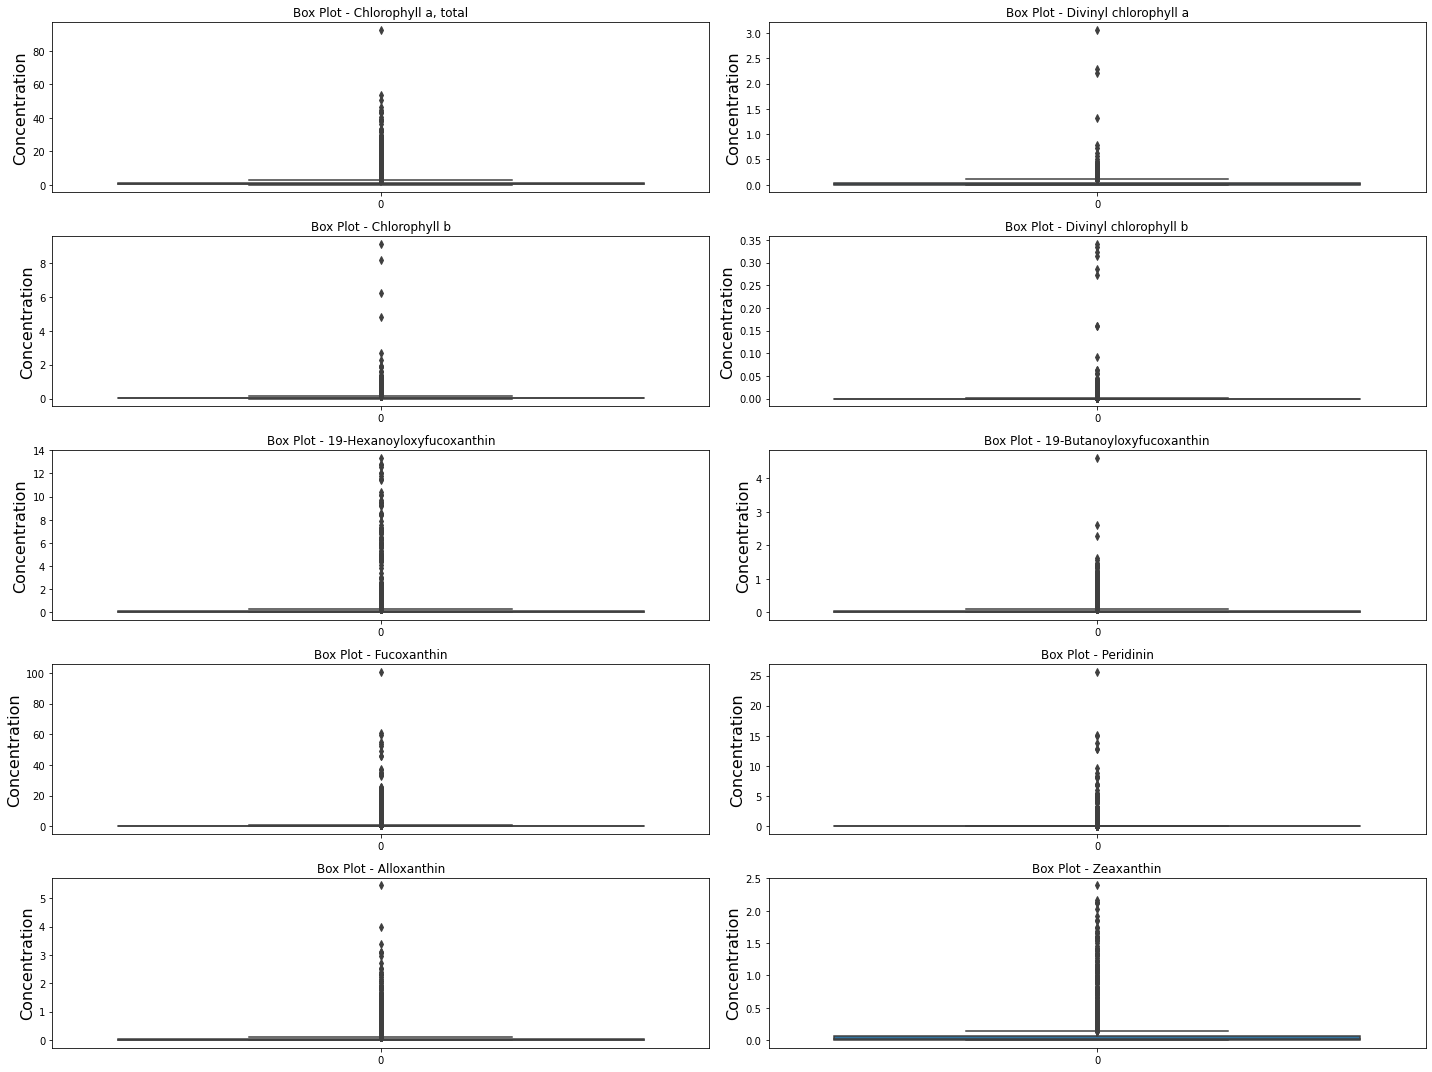

In [19]:
nb_variables = 10
figure = plt.figure(figsize=(20, 15))
nbPlt = nb_variables*(nb_variables-1)/2
nb_c = 2
# nb_l = int(np.ceil(nbPlt/nb_c))
nb_l = 5
cpt=0
for i in range(nb_variables):
        cpt+=1
        ax=plt.subplot(nb_l,nb_c,cpt)
        sns.boxplot(data=df_global_data.iloc[:,i])
        #plt.xlabel(f'Concentration',fontsize=16)
        plt.ylabel('Concentration',fontsize=16)
        plt.title(f"Box Plot - {pigments[i]}")
        plt.tight_layout()
        #plt.xscale('log')
 

In [140]:
def boxplot_data(df,selection,a,b,params=(20,8)):
    plt.rcParams['figure.figsize']=params
    fig, axes = plt.subplots(1, len(selection))
    
    for i, col in enumerate(selection):
        ax = sns.boxplot(y=df[col], ax=axes.flatten()[i], showfliers=False)
        ax.set_ylim(a,b)
        #ax.set_ylim(df[col].min(), df[col].max())
        ax.set_ylabel(f'concentration en {col}')
    fig.tight_layout()

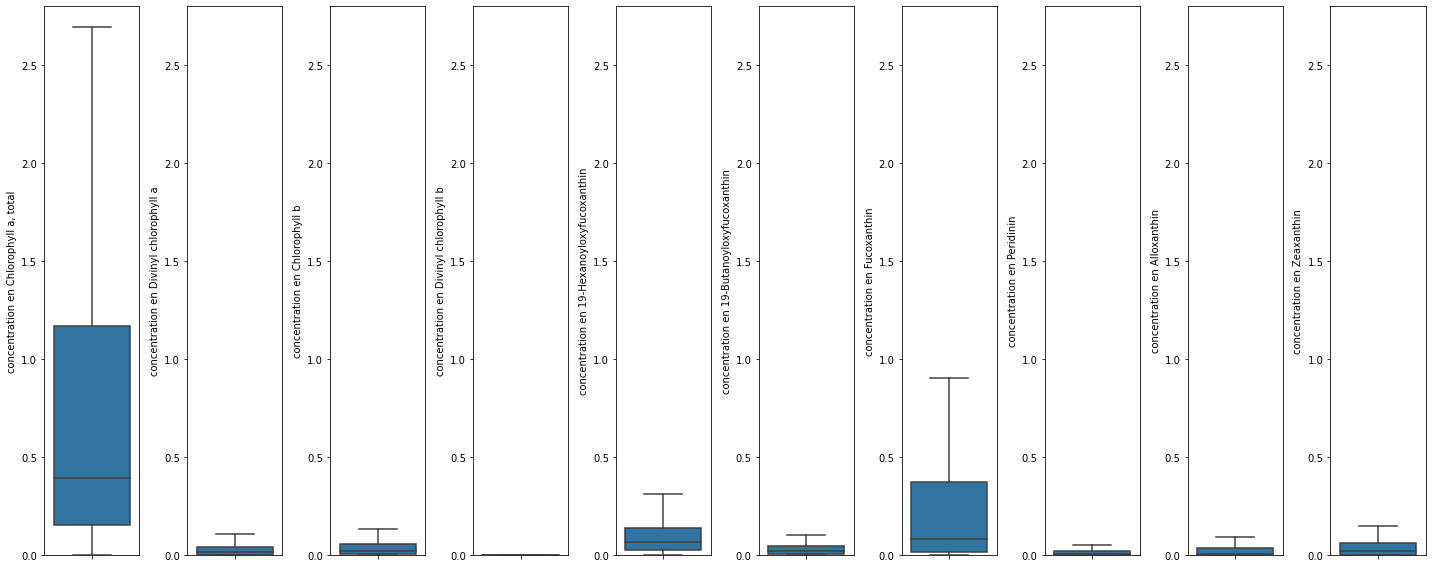

In [141]:
boxplot_data(df_global_data,pigments,0,2.8)

### Histogrammes des variables

On s'intéresse d'abord à la répartition des concentrations de chaque pigment pour la grosse base de données *'global_data'*.

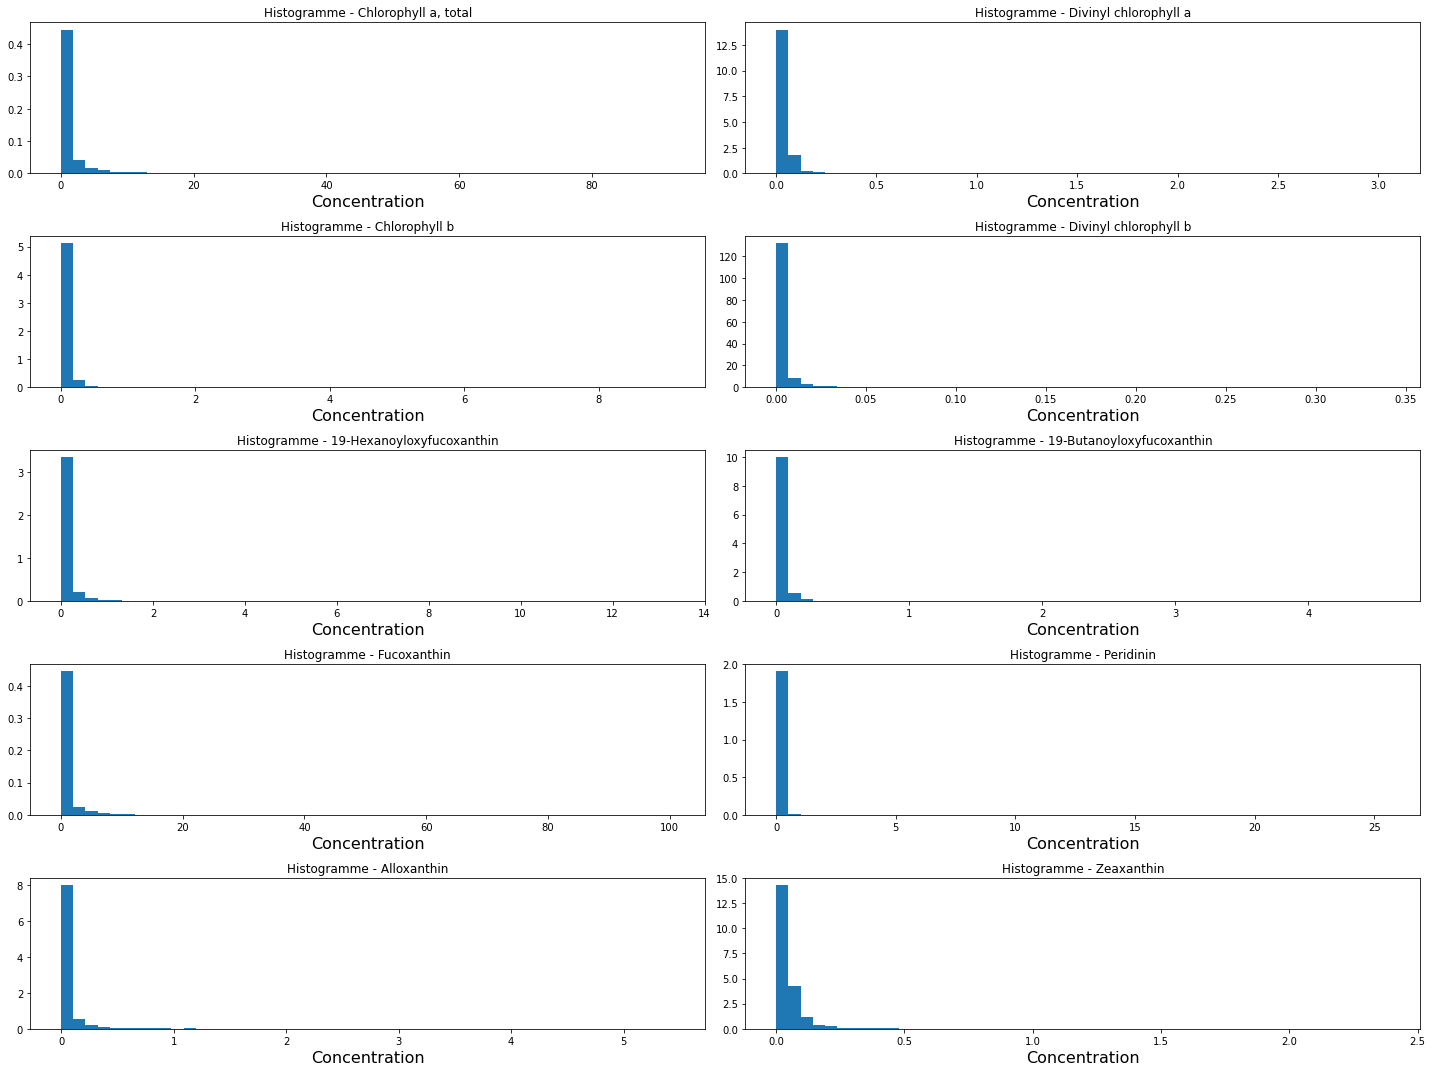

In [20]:

nb_variables = 10
figure = plt.figure(figsize=(20, 15))
nbPlt = nb_variables*(nb_variables-1)/2
nb_c = 2
# nb_l = int(np.ceil(nbPlt/nb_c))
nb_l = 5
cpt=0
for i in range(nb_variables):
        cpt+=1
        ax=plt.subplot(nb_l,nb_c,cpt)
        ax.hist(df_global_data[pigments[i]].values, density=True, bins=50)
        plt.xlabel(f'Concentration',fontsize=16)
        #plt.ylabel(f'{}',fontsize=16)
        plt.title(f"Histogramme - {pigments[i]}")
        plt.tight_layout()
        #plt.xscale('log')

## 1.2. Base de données *tara_data*

In [21]:
columns_taradata = df_tara_data.columns
haptophytes = df_tara_data.columns[:7]

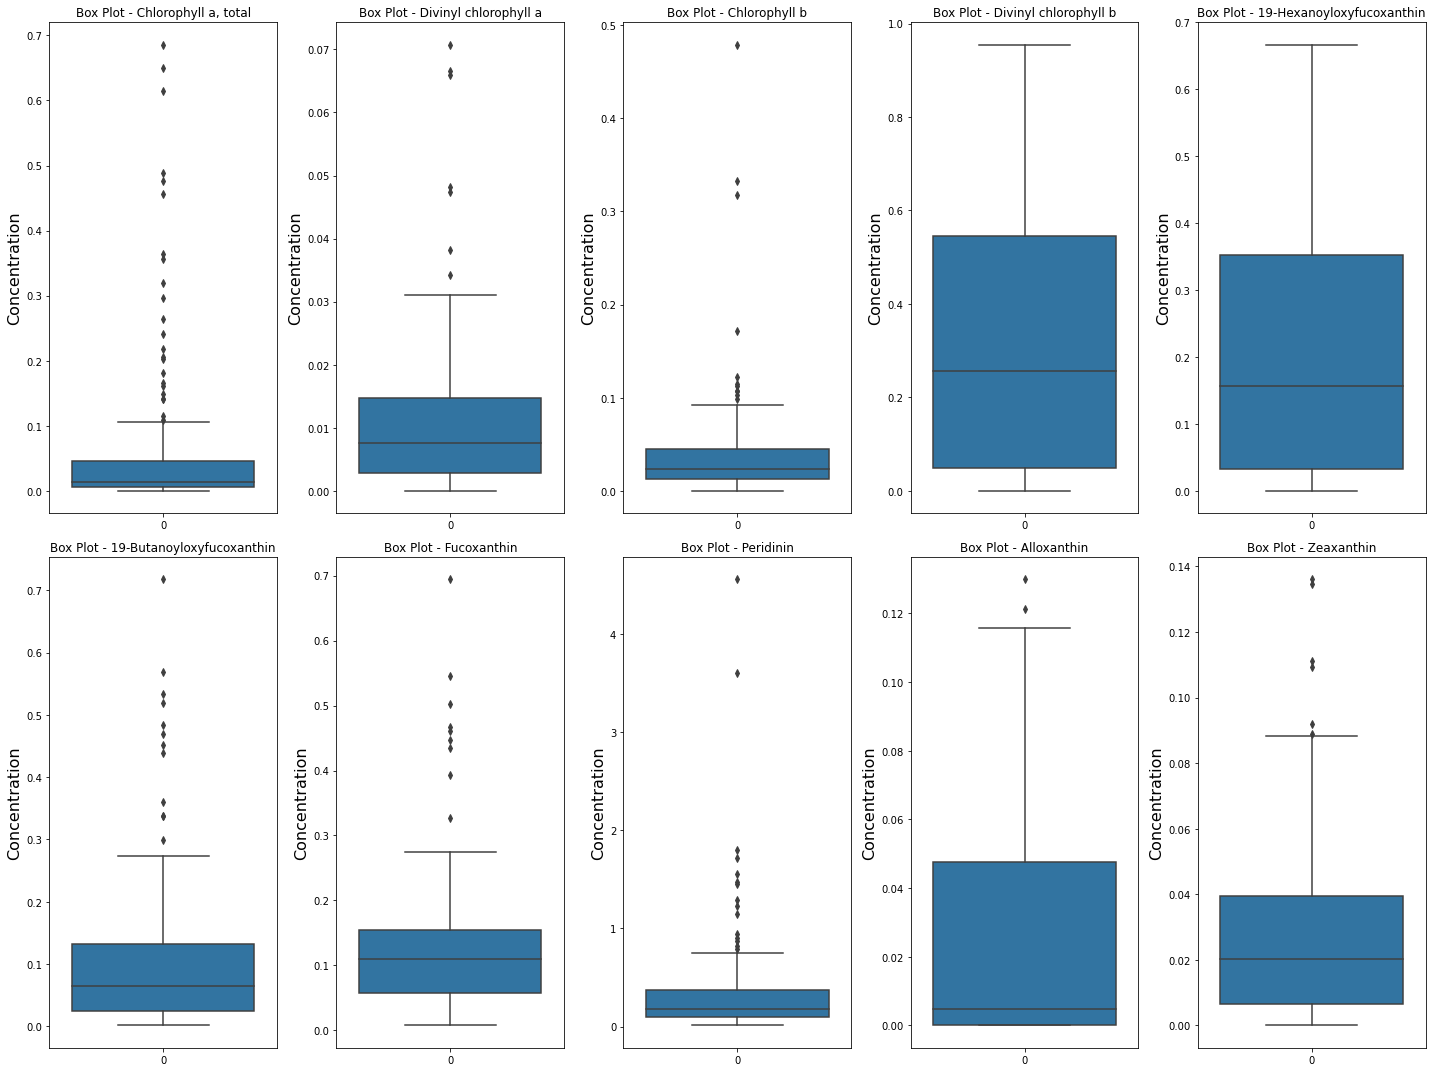

In [142]:
nb_variables = 10
figure = plt.figure(figsize=(20, 15))
nbPlt = nb_variables*(nb_variables-1)/2
nb_c = 5
#nb_l = int(np.ceil(nbPlt/nb_c))
nb_l = 2
cpt=0
for i in range(nb_variables):
        cpt+=1
        ax=plt.subplot(nb_l,nb_c,cpt)
        sns.boxplot(data=df_tara_data.iloc[:,i])
        #plt.xlabel(f'Concentration',fontsize=16)
        plt.ylabel('Concentration',fontsize=16)
        plt.title(f"Box Plot - {pigments[i]}")
        plt.tight_layout()
        #plt.xscale('log')

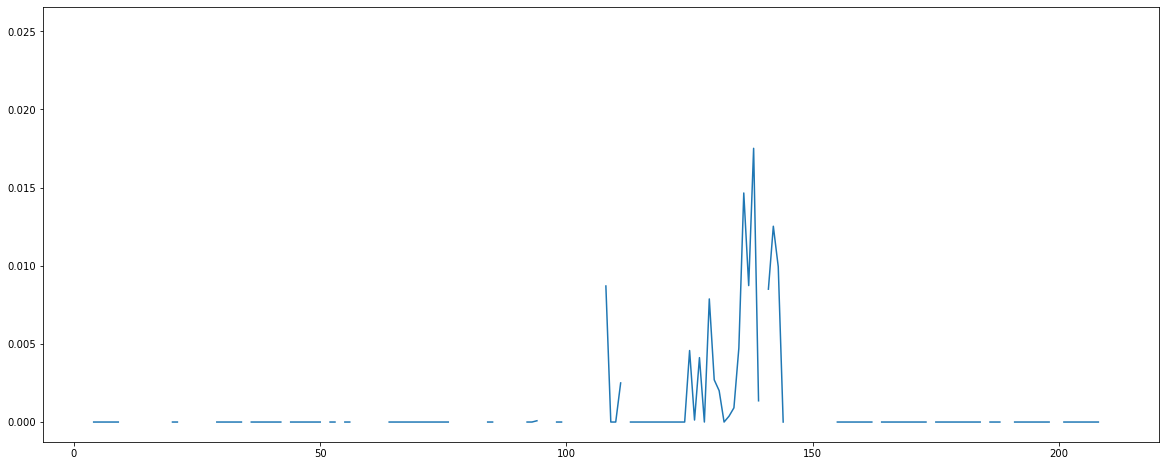

In [143]:
plt.plot(df_tara_data['Divinyl chlorophyll b'])

In [144]:
df_tara_data.describe()

,Diatoms,Coccolithophores (Haptophytes),Dinoflagellates,Prochlorococcus,Synechococcus,chlorophytes,other_Haptophytes,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,145.00000,145.00000,145.00000,145.00000,145.00000,145.00000,145.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000,144.00000
mean,0.06411,0.01099,0.03877,0.32250,0.20913,0.10801,0.12807,0.36480,0.02575,0.02861,0.00095,0.04362,0.01422,0.08484,0.01271,0.00688,0.03858
std,0.12733,0.01244,0.05796,0.29090,0.19124,0.12877,0.10910,0.56483,0.03319,0.02851,0.00340,0.06607,0.02077,0.22265,0.03433,0.01721,0.03639
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00144,0.00759,0.01150,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00529,0.00286,0.01266,0.04962,0.03241,0.02419,0.05791,0.09940,0.00000,0.00660,0.00000,0.00874,0.00278,0.00330,0.00086,0.00000,0.00737
50%,0.01409,0.00754,0.02296,0.25669,0.15735,0.06468,0.10967,0.18032,0.00484,0.02037,0.00000,0.01763,0.00530,0.01145,0.00298,0.00060,0.02855
75%,0.04639,0.01477,0.04516,0.54463,0.35243,0.13215,0.15514,0.37374,0.04756,0.03952,0.00000,0.05433,0.01722,0.07493,0.00665,0.00429,0.05994
max,0.68563,0.07074,0.47891,0.95468,0.66675,0.71755,0.69430,4.55640,0.12995,0.13604,0.02529,0.41720,0.12040,1.78110,0.23380,0.10570,0.17934


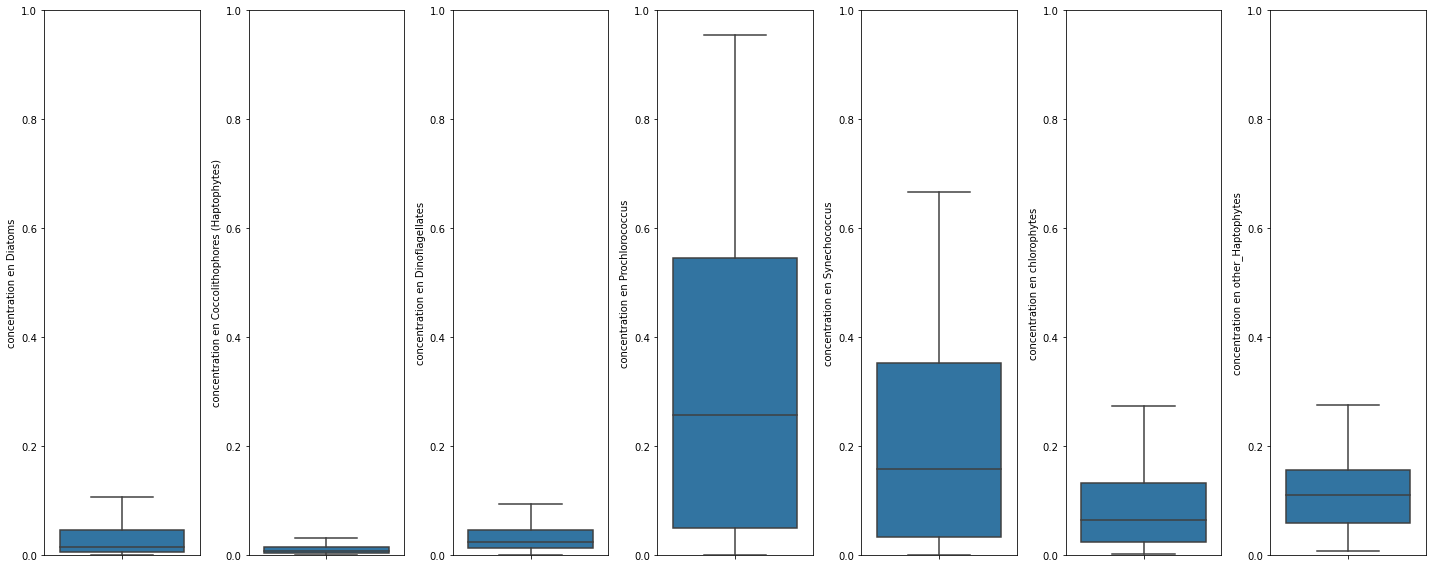

In [145]:
boxplot_data(df_tara_data,haptophytes,0,1)

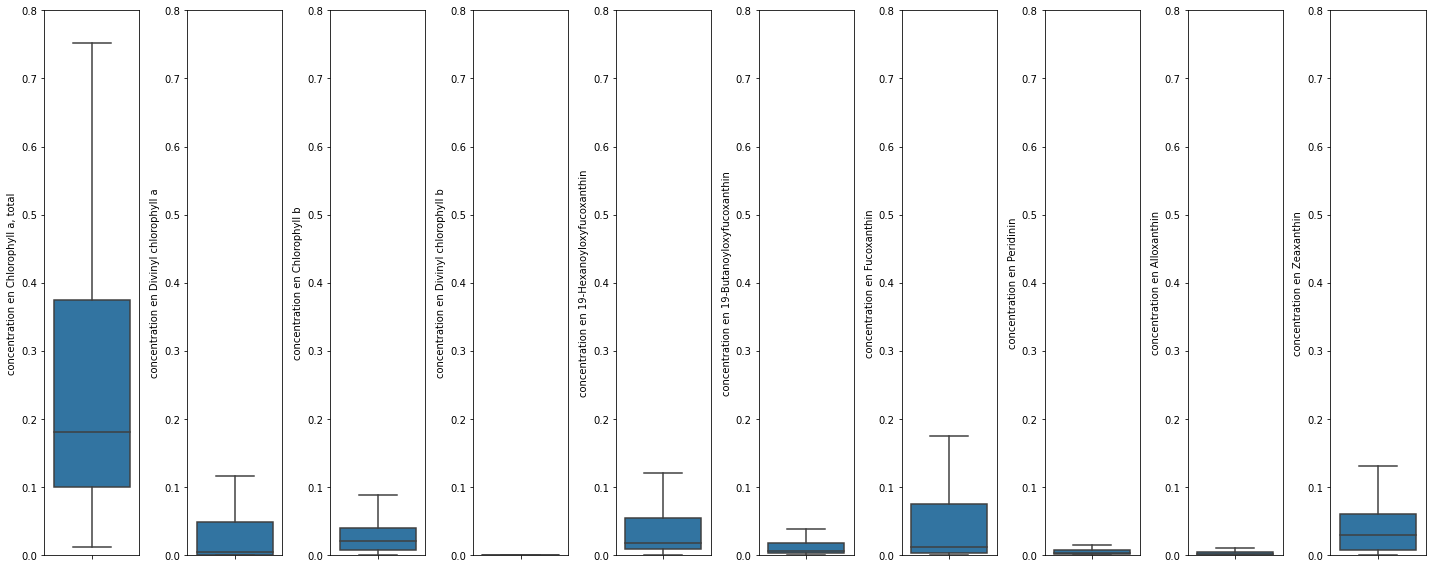

In [146]:
boxplot_data(df_tara_data,pigments,0,0.8)

# 2. Analyse des valeurs manquantes

Dans cette partie, on va s'intéresser aux données manquantes des tableaux. Celles-ci apparaissent sous la forme *'NaN'*.

## 2.1. Base de données *global_data*

### Décompte sur les variables

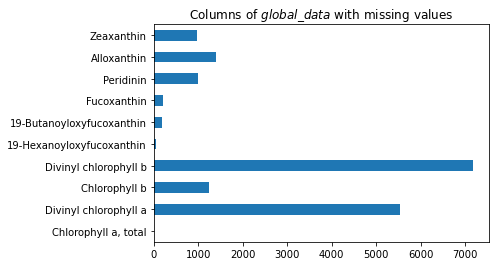

In [22]:
df_global_data.isna().sum().plot.barh()
plt.title('Columns of $global\_data$ with missing values')
plt.show()

On remarque aussi que certaines variables ont une proportion de valeurs NaN considérables. Calculons ce pourcentage.

In [23]:
pctg_nan_global = np.reshape(np.array(df_global_data.isna().sum()/np.shape(df_global_data)[0]*100),(1,10))
df_pctgNaN_global = pd.DataFrame(np.around(pctg_nan_global,2),columns = pigments, index = ['% de NaN'])
display(df_pctgNaN_global)

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
% de NaN,0.0,58.4,13.1,75.62,0.44,1.99,2.27,10.38,14.72,10.16


In [25]:
dfi.export(df_pctgNaN_global, 'Tableau pctge NaN global.png')

### Valeurs négatives

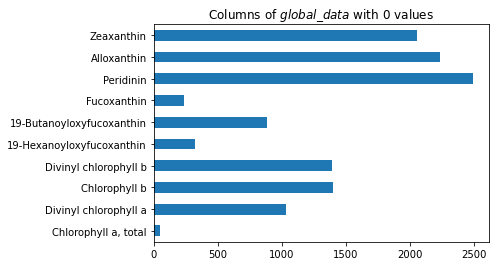

In [26]:
(df_global_data == 0).sum(axis=0).plot.barh()
plt.title('Columns of $global\_data$ with 0 values')
plt.show()

In [27]:
((df_global_data < 0)).sum(axis=0)

Chlorophyll a, total         0
Divinyl chlorophyll a        0
Chlorophyll b                0
Divinyl chlorophyll b        0
19-Hexanoyloxyfucoxanthin    1
19-Butanoyloxyfucoxanthin    0
Fucoxanthin                  2
Peridinin                    0
Alloxanthin                  3
Zeaxanthin                   0
dtype: int64

Le résultat ci-dessus nous montre que certaines valeurs de concentrations sont négatives. Ceci est bien évidemment impossible et résulte d'une erreur de mesure ou de retranscription.

On peut soit dire que c'est une erreur de frappe et prendre la valeur absolue, soit refaire une imputation en ciblant les valeurs négatives, soit attribuer 0 aux valeurs négatives.

N'ayant pas d'informations précises à ce sujet, on choisira la dernière option.

In [28]:
df_global_data[df_global_data < 0] = 0

### NaN par individu

On aimerait savoir si certains individus possèdent plus de la moitié de leurs valeurs nulles; auquel cas, on pourrait les considérer comme peu significatifs et donc décider de ne pas les considérer pour ne pas fausser l'interprétation.

In [29]:
seuil_individu = 0.75

In [30]:
nbNaN_indiv_global = df_global_data.isna().sum(axis=1)

In [31]:
index_indiv_global_seuilNaN = np.where(nbNaN_indiv_global/np.shape(df_global_data)[1] > seuil_individu)

In [32]:
nb_indiv_global_seuilNaN = np.shape(index_indiv_global_seuilNaN)[1]
print(f'On a donc {nb_indiv_global_seuilNaN} individu qui présente {seuil_individu*100}% ou plus de valeurs manquantes.')

On a donc 41 individu qui présente 75.0% ou plus de valeurs manquantes.


## 2.2. Base de données *tara_data*

### Décompte sur les variables

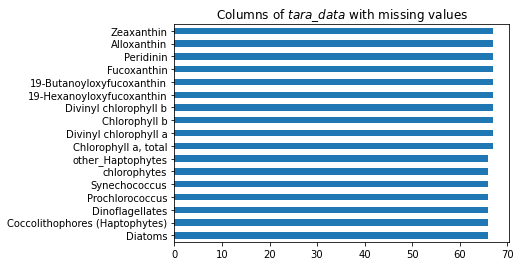

In [33]:
is_column_with_NaN = df_tara_data.isna().sum()
is_column_with_NaN[is_column_with_NaN != 0].plot.barh()
plt.title('Columns of $tara\_data$ with missing values')
plt.show()

In [34]:
pctg_nan_tara = np.reshape(np.array(df_tara_data.isna().sum()/np.shape(df_tara_data)[0]*100),(1,17))
df_pctgNaN_tara = pd.DataFrame(np.around(pctg_nan_tara,2),columns = columns_taradata, index = ['% de NaN'])
display(df_pctgNaN_tara)

,Diatoms,Coccolithophores (Haptophytes),Dinoflagellates,Prochlorococcus,Synechococcus,chlorophytes,other_Haptophytes,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
% de NaN,31.28,31.28,31.28,31.28,31.28,31.28,31.28,31.75,31.75,31.75,31.75,31.75,31.75,31.75,31.75,31.75,31.75


In [35]:
dfi.export(df_pctgNaN_tara, 'Tableau pctge NaN tara.png')

### NaN par individus

In [36]:
nbNaN_indiv_tara = df_tara_data.isna().sum(axis=1)
index_indiv_tara_seuilNaN = np.where(nbNaN_indiv_tara/np.shape(df_tara_data)[1] > seuil_individu)

In [37]:
nb_indiv_tara_seuilNaN = np.shape(index_indiv_tara_seuilNaN)[1]
print(f'On a donc {nb_indiv_tara_seuilNaN} individu qui présente {seuil_individu*100}% ou plus de valeurs manquantes.')

On a donc 28 individu qui présente 75.0% ou plus de valeurs manquantes.


### Valeurs négatives

Pas de valeurs négatives dans la base de données tara.

# 3. **Etude bi-dimensionnelle**

## 3.1. Données brutes

### a) Corrélations des variables de *global_data*

In [38]:
df_global_data.corr()

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
"Chlorophyll a, total",1.00000,-0.06194,0.36365,-0.01328,0.09536,0.12494,0.63218,0.46702,0.31446,0.12861
Divinyl chlorophyll a,-0.06194,1.00000,-0.06417,0.20846,-0.03670,-0.02062,-0.08937,-0.04830,-0.10159,0.27040
Chlorophyll b,0.36365,-0.06417,1.00000,-0.02682,0.03800,0.03127,0.13016,0.30308,0.14270,0.20323
Divinyl chlorophyll b,-0.01328,0.20846,-0.02682,1.00000,0.11675,0.22185,0.00611,-0.01508,-0.00377,0.01133
19-Hexanoyloxyfucoxanthin,0.09536,-0.03670,0.03800,0.11675,1.00000,0.06753,0.04268,-0.00762,0.13072,-0.02032
19-Butanoyloxyfucoxanthin,0.12494,-0.02062,0.03127,0.22185,0.06753,1.00000,0.21145,0.01390,0.00350,-0.03432
Fucoxanthin,0.63218,-0.08937,0.13016,0.00611,0.04268,0.21145,1.00000,0.15628,0.07138,-0.01184
Peridinin,0.46702,-0.04830,0.30308,-0.01508,-0.00762,0.01390,0.15628,1.00000,0.15346,0.13548
Alloxanthin,0.31446,-0.10159,0.14270,-0.00377,0.13072,0.00350,0.07138,0.15346,1.00000,0.09964
Zeaxanthin,0.12861,0.27040,0.20323,0.01133,-0.02032,-0.03432,-0.01184,0.13548,0.09964,1.00000


In [39]:
base_filename = os.getcwd()+'/Images'
base_filename

'C:\\Users\\paulg\\Documents\\Master TRIED\\Cours\\Etude de cas\\Git repository\\Etude_de_cas_TRIED/Images'

In [40]:
# fig = plt.figure(figsize=(16,10))
# base_filename = os.getcwd()+'/Images'
# ax = sns.heatmap(df_global_data.corr(method='pearson'), annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
# #
# filename_png = base_filename +"_correlations_data_global.png"
# plt.savefig(filename_png, dpi=300)

La matrice de corrélation, que ce soit en utilisant les coefficients de Pearson ou de Spearman (sur les rangs), ne permet pas de mettre en lumière une corrélation linéaire entre les différentes variables. Ceci est vrai pour toutes les variables à l'exception de la *'Chlorophyll a, total'* qui semble être corrélée au *'Fucoxanthin'*. 

Essayons maintenant de tracer les diagrammes de dispersion afin d'observer une potentielle relation autre que linéaire entre les variables.

In [41]:
# fig = plt.figure(figsize=(16,10))
# g = sns.pairplot(df_global_data, diag_kind="kde", markers="+",
#                   plot_kws=dict(s=50, edgecolor="b", linewidth=1),
#                   diag_kws=dict(shade=True))

On peut avancer que certaines courbes semblent suivre une loi inverse de la forme $y = \frac{1}{x^p}$. Il apparaît donc intéressant de tracer d'étudier la relation entre les logarithmes des variables. On verra ça un peu plus loin.

### b) Corrélations des datas tara

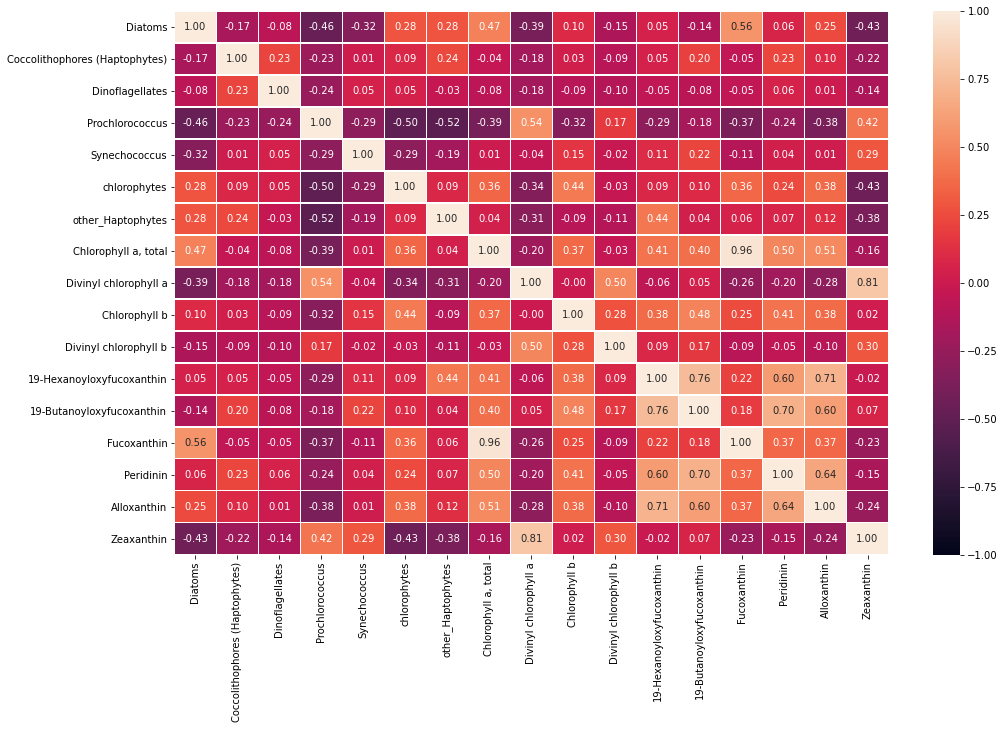

In [88]:
fig = plt.figure(figsize=(16,10))
base_filename = os.getcwd()+'/Images'
ax = sns.heatmap(df_tara_data.corr(method='pearson').iloc[:,:], annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
#
filename_png = base_filename +"_correlations_tara.png"
plt.savefig(filename_png, dpi=300)

In [43]:
# fig = plt.figure(figsize=(16,10))
# base_filename = os.getcwd()+'/Images'
# ax = sns.heatmap(df_tara_data.corr(method='pearson').iloc[7:,:], annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
# #
# filename_png = base_filename +"_correlations_tara.png"
# plt.savefig(filename_png, dpi=300)

In [44]:
# fig = plt.figure(figsize=(16,10))
# g = sns.pairplot(df_tara_data, diag_kind="kde", markers="+",
#                   plot_kws=dict(s=50, edgecolor="b", linewidth=1),
#                   diag_kws=dict(shade=True))

## 3.2. Données transformées $X' = ln(1+X)$ 

In [45]:
df_ln_global = np.log(df_global_data + 1)
df_ln_global.head()

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,0.39339,0.05354,0.05733,NaN,0.08158,0.01587,0.02859,0.01686,0.00698,0.17227
1,0.81004,0.00000,0.24451,NaN,0.22154,0.05921,0.28668,0.06204,0.10075,0.03826
2,0.92307,0.00000,0.18731,NaN,0.21026,0.06297,0.49225,0.05449,0.18814,0.02956
3,1.47316,0.00000,0.00000,NaN,0.12839,0.03440,1.11743,0.08158,0.00000,0.04688
4,0.84372,0.00000,0.17563,NaN,0.25309,0.05164,0.28968,0.14150,0.03150,0.16042


In [46]:
df_ln_tara = np.log(df_tara_data + 1)
df_ln_tara.head()

,Diatoms,Coccolithophores (Haptophytes),Dinoflagellates,Prochlorococcus,Synechococcus,chlorophytes,other_Haptophytes,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.00377,0.01400,0.02305,0.51927,0.14602,0.03329,0.03514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.01384,0.01664,0.03086,0.17649,0.36334,0.04597,0.12019,0.35077,0.00126,0.03269,0.0,0.02501,0.00387,0.11457,0.0,0.00154,0.00694


### a) Corrélations ln_global

In [47]:
# fig = plt.figure(figsize=(16,10))
# base_filename = os.getcwd()+'/Images'
# ax = sns.heatmap(df_ln_global.corr(method='kendall'), annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
# 
# filename_png = base_filename +"_correlations_ln_data_global.png"
# plt.savefig(filename_png, dpi=300)

In [48]:
# fig = plt.figure(figsize=(16,10))
# g = sns.pairplot(df_ln_tara, diag_kind="kde", markers="+",
#                   plot_kws=dict(s=50, edgecolor="b", linewidth=1),
#                   diag_kws=dict(shade=True))

### b) Corrélations ln_tara

In [49]:
# fig = plt.figure(figsize=(16,10))
# base_filename = os.getcwd()+'/Images'
# ax = sns.heatmap(df_ln_tara.corr().iloc[:7,:], annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
# #
# filename_png = base_filename +"_correlations_tara.png"
# plt.savefig(filename_png, dpi=300)

In [50]:
# fig = plt.figure(figsize=(16,10))
# base_filename = os.getcwd()+'/Images'
# ax = sns.heatmap(df_ln_tara.corr().iloc[7:,:], annot=True, fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
# #
# filename_png = base_filename +"_correlations_tara.png"
# plt.savefig(filename_png, dpi=300)

In [51]:
# fig = plt.figure(figsize=(16,10))
# g = sns.pairplot(df_ln_tara.iloc[:,7:], diag_kind="kde", markers="+",
#                   plot_kws=dict(s=50, edgecolor="b", linewidth=1),
#                   diag_kws=dict(shade=True))

# 4. Imputation des valeurs manquantes

Au vu des histogrammes et tableaux de valeurs manquantes (NaN), on décide de procéder à une imputation des données manquantes. Pour cela, on essaie différentes méthodes.

## 4.0. Normalisation des données 

In [101]:
#Global data
df_global_data_normalized = (df_global_data-df_global_data.mean())/df_global_data.std()
#np.around(df_global_data_normalized.describe())

#Tara data
df_tara_data_normalized = (df_tara_data-df_tara_data.mean())/df_tara_data.std()
#np.around(df_tara_data_normalized.describe())

## 4.1. Comparaison 4 méthode d'imputation

In [102]:
#Importation KNN
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

#Importation Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

#Importation MissForest
from missingpy import MissForest

### a) *global_data*

In [103]:
def evaluation_global(global_data_phyto_hplc, pctge_NaN,methode_imputation):
    global_data_phyto_hplc_sans_nan=global_data_phyto_hplc.copy()
    global_data_phyto_hplc_sans_nan.dropna(inplace=True)
    tableau_pigments=[np.zeros(np.shape(global_data_phyto_hplc_sans_nan)[0]) for i in range(0,10)]
    for i,tab in enumerate(tableau_pigments):
        compteur=0
        while (compteur/len(tab)) <= pctge_NaN[i]/100:
            tab[np.random.randint(0,np.shape(global_data_phyto_hplc_sans_nan)[0])]=1
            compteur+=1
    tableau_repartition = tableau_pigments
    
    dict={'Chlorophyll a, total':tableau_repartition[0], 'Divinyl chlorophyll a':tableau_repartition[1], 'Chlorophyll b':tableau_repartition[2],
       'Divinyl chlorophyll b':tableau_repartition[3], '19-Hexanoyloxyfucoxanthin':tableau_repartition[4],
       '19-Butanoyloxyfucoxanthin':tableau_repartition[5], 'Fucoxanthin':tableau_repartition[6], 'Peridinin':tableau_repartition[7], 'Alloxanthin':tableau_repartition[8],
       'Zeaxanthin':tableau_repartition[9]}
    
    global_data_phyto_hplc_avec_nan = global_data_phyto_hplc_sans_nan.copy()
    index=list(global_data_phyto_hplc_sans_nan.index)
    for column in global_data_phyto_hplc_avec_nan.columns:
       for ind in index:
           if dict[column][index.index(ind)]==1:
               global_data_phyto_hplc_avec_nan.at[ind,column]='NaN'
    
    #Faire l'imputation ici
    #IMPUTATION PAR LA MEDIANE
    if methode_imputation == 'mediane':
        global_data_phyto_hplc_median_avec_nan = global_data_phyto_hplc_avec_nan.copy()

        for column in global_data_phyto_hplc_avec_nan.columns:
             median = global_data_phyto_hplc[column].median()
             global_data_phyto_hplc_median_avec_nan[column].fillna(median,inplace=True)
             global_data_phyto_hplc_imputed = global_data_phyto_hplc_median_avec_nan.values
    
    #IMPUTATION KNN
    if methode_imputation == 'KNN':
        global_data_phyto_hplc_KNN_avec_nan = global_data_phyto_hplc_avec_nan.copy()
        imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights= 'uniform')
        global_data_phyto_hplc_imputed = imputer.fit_transform(global_data_phyto_hplc_KNN_avec_nan)
        
    #IMPUTATION ITERATIVE
    if methode_imputation == 'iterative':
        global_data_phyto_hplc_II_avec_nan = global_data_phyto_hplc_avec_nan.copy()
        imputer_iteratif = IterativeImputer(random_state=0,max_iter=100)
        global_data_phyto_hplc_imputed = imputer_iteratif.fit_transform(global_data_phyto_hplc_II_avec_nan)
        
    #IMPUTATION MISSFOREST
    if methode_imputation == 'MissForest':
        global_data_phyto_hplc_MF_avec_nan = global_data_phyto_hplc_avec_nan.copy()
        missforest_imputer = MissForest()
        global_data_phyto_hplc_imputed = missforest_imputer.fit_transform(global_data_phyto_hplc_MF_avec_nan)
         
    return np.linalg.norm(global_data_phyto_hplc_imputed - global_data_phyto_hplc_sans_nan.values,
                   axis=1), np.linalg.norm(global_data_phyto_hplc_imputed - global_data_phyto_hplc_sans_nan.values,
                   axis=1).mean()

In [104]:
evaluation_global(df_global_data_normalized, pctg_nan_global[0],'mediane')

(array([0.    , 0.0156, 0.    , ..., 0.0073, 0.0073, 0.3723]),
 0.321019100885872)

In [106]:
# Comparaison des différentes méthodes d'imputation pour tara_data
# On procèdera à 10 initialisations différentes

methodes = ['mediane','KNN','iterative','MissForest']
nb_experiences = 10 
distances_global = np.zeros([len(methodes),nb_experiences])

for k in range (nb_experiences):
    for i,methode in enumerate(methodes):
        distances_global[i,k] = evaluation_global(df_global_data_normalized, pctg_nan_global[0],methode)[1]
distances_global

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


array([[0.3089, 0.2746, 0.3035, 0.3058, 0.3151, 0.2902, 0.2974, 0.3162, 0.3268, 0.3289],
       [0.2097, 0.1986, 0.222 , 0.2452, 0.2019, 0.1969, 0.2241, 0.2128, 0.215 , 0.2045],
       [0.3153, 0.3749, 0.2734, 0.2699, 0.2716, 0.2848, 0.2748, 0.2778, 0.2995, 0.2746],
       [0.171 , 0.1664, 0.1607, 0.1668, 0.1652, 0.1544, 0.1795, 0.1547, 0.1622, 0.1831]])

In [107]:
df_distances_global = pd.DataFrame(distances_global.T,columns = methodes)
df_distances_global.describe()

,mediane,KNN,iterative,MissForest
count,10.00000,10.00000,10.00000,10.00000
mean,0.30674,0.21305,0.29167,0.16639
std,0.01655,0.01458,0.03261,0.00946
min,0.27456,0.19693,0.26993,0.15441
25%,0.29895,0.20252,0.27368,0.16107
50%,0.30733,0.21122,0.27632,0.16576
75%,0.31594,0.22021,0.29581,0.16995
max,0.32888,0.24516,0.37493,0.18310


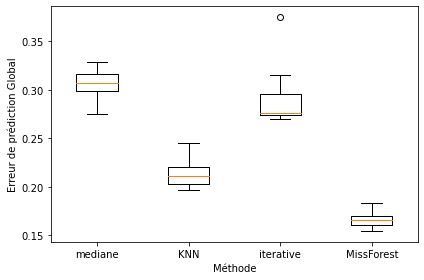

In [108]:
plt.boxplot(distances_global.T, vert=True)
plt.xlabel('Méthode')
plt.ylabel('Erreur de prédiction Global')
locs, labels = plt.xticks()
plt.xticks(locs,labels=methodes)

plt.tight_layout()
plt.savefig('Comparaison_imputation_global.png', dpi=300)

### b) *tara_data*

Evaluation pour la base de données *tara_data*

In [109]:
haptophytes = ['Diatoms',
               'Coccolithophores (Haptophytes)',
               'Dinoflagellates',
               'Prochlorococcus',
               'Synechococcus',
               'chlorophytes',
               'other_Haptophytes']

In [110]:
def evaluation_tara(tara_data_phyto_hplc,methode_imputation):
    tara_data_phyto_hplc_sans_nan=tara_data_phyto_hplc.copy()
    tara_data_phyto_hplc_sans_nan.dropna(inplace=True)
    tableau_pigments=[np.zeros(106) for i in range(0,10)]
    for tab in tableau_pigments:
        compteur=0
        while (compteur/len(tab))<=0.3175:
            tab[np.random.randint(0,106)]=1
            compteur+=1
    tableau_haptophytes=[np.zeros(106) for i in range(0,7)]
    for tab in tableau_haptophytes:
        compteur=0
        while (compteur/len(tab))<=0.3128:
            tab[np.random.randint(0,106)]=1
            compteur+=1
    tableau_repartition=tableau_haptophytes+tableau_pigments
    
    dict={'Diatoms':tableau_repartition[0],
       'Coccolithophores (Haptophytes)':tableau_repartition[1], 'Dinoflagellates':tableau_repartition[2], 'Prochlorococcus':tableau_repartition[3],
       'Synechococcus':tableau_repartition[4], 'chlorophytes':tableau_repartition[5], 'other_Haptophytes':tableau_repartition[6],
       'Chlorophyll a, total':tableau_repartition[7], 'Divinyl chlorophyll a':tableau_repartition[8], 'Chlorophyll b':tableau_repartition[9],
       'Divinyl chlorophyll b':tableau_repartition[10], '19-Hexanoyloxyfucoxanthin':tableau_repartition[11],
       '19-Butanoyloxyfucoxanthin':tableau_repartition[12], 'Fucoxanthin':tableau_repartition[13], 'Peridinin':tableau_repartition[14], 'Alloxanthin':tableau_repartition[15],
       'Zeaxanthin':tableau_repartition[16]}
    
    tara_data_phyto_hplc_avec_nan=tara_data_phyto_hplc_sans_nan.copy()
    index=list(tara_data_phyto_hplc_sans_nan.index)
    for column in tara_data_phyto_hplc_avec_nan.columns:
       for ind in index:
           if dict[column][index.index(ind)]==1:
               tara_data_phyto_hplc_avec_nan.at[ind,column]='NaN'
    
    #Faire l'imputation ici
    #IMPUTATION PAR LA MEDIANE
    if methode_imputation == 'mediane':
        tara_data_phyto_hplc_median_avec_nan = tara_data_phyto_hplc_avec_nan.copy()

        for column in tara_data_phyto_hplc_avec_nan.columns:
             median = tara_data_phyto_hplc[column].median()
             tara_data_phyto_hplc_median_avec_nan[column].fillna(median,inplace=True)
             tara_data_phyto_hplc_imputed = tara_data_phyto_hplc_median_avec_nan.values
    
    #IMPUTATION KNN
    if methode_imputation == 'KNN':
        tara_data_phyto_hplc_KNN_avec_nan = tara_data_phyto_hplc_avec_nan.copy()
        imputer = KNNImputer(missing_values=np.nan, n_neighbors=5, weights= 'uniform')
        tara_data_phyto_hplc_imputed = imputer.fit_transform(tara_data_phyto_hplc_KNN_avec_nan)
        
    #IMPUTATION ITERATIVE
    if methode_imputation == 'iterative':
        tara_data_phyto_hplc_II_avec_nan = tara_data_phyto_hplc_avec_nan.copy()
        imputer_iteratif = IterativeImputer(random_state=0,max_iter=100)
        tara_data_phyto_hplc_imputed = imputer_iteratif.fit_transform(tara_data_phyto_hplc_II_avec_nan)
        
    #IMPUTATION MISSFOREST
    if methode_imputation == 'MissForest':
        tara_data_phyto_hplc_MF_avec_nan = tara_data_phyto_hplc_avec_nan.copy()
        missforest_imputer = MissForest()
        tara_data_phyto_hplc_imputed = missforest_imputer.fit_transform(tara_data_phyto_hplc_MF_avec_nan)
         
    return np.linalg.norm(tara_data_phyto_hplc_imputed - tara_data_phyto_hplc_sans_nan.values,
                   axis=1), np.linalg.norm(tara_data_phyto_hplc_imputed - tara_data_phyto_hplc_sans_nan.values,
                   axis=1).mean()

In [111]:
# Comparaison des différentes méthodes d'imputation pour tara_data
# On procèdera à 10 initialisations différentes

methodes = ['mediane','KNN','iterative','MissForest']
nb_experiences = 10 
distances = np.zeros([len(methodes),nb_experiences])

for k in range (nb_experiences):
    for i,methode in enumerate(methodes):
        distances[i,k] = evaluation_tara(df_tara_data_normalized,methode)[1]
distances

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


array([[1.6839, 1.6076, 1.7687, 1.6731, 1.5155, 1.576 , 1.6447, 1.4207, 1.581 , 1.759 ],
       [1.2552, 1.4315, 1.1799, 1.2236, 1.3237, 1.251 , 1.4176, 1.3461, 1.1109, 1.3102],
       [1.5193, 1.2349, 1.349 , 1.2922, 1.3532, 1.3399, 1.4825, 1.3665, 1.4279, 1.3479],
       [1.1013, 1.2094, 1.0377, 1.1375, 1.1833, 1.0929, 1.3254, 1.1815, 1.217 , 1.1967]])

In [112]:
df_distances = pd.DataFrame(distances.T,columns = methodes)
df_distances.describe()

,mediane,KNN,iterative,MissForest
count,10.00000,10.00000,10.00000,10.00000
mean,1.62301,1.28496,1.37132,1.16827
std,0.10703,0.10116,0.08479,0.08037
min,1.42070,1.11086,1.23487,1.03771
25%,1.57724,1.23045,1.34188,1.11037
50%,1.62615,1.28270,1.35108,1.18243
75%,1.68117,1.34047,1.41253,1.20624
max,1.76872,1.43148,1.51930,1.32540


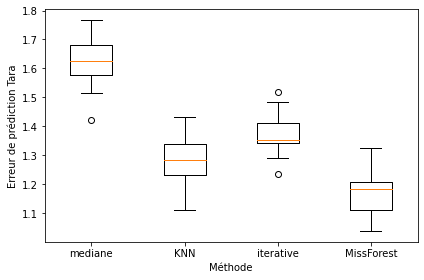

In [113]:
plt.boxplot(distances.T, vert=True)
plt.xlabel('Méthode')
plt.ylabel('Erreur de prédiction Tara')
locs, labels = plt.xticks()
plt.xticks(locs,labels=methodes)

plt.tight_layout()

plt.savefig('Comparaison_imputation_tara.png', dpi=300)

## 4.3. Imputation par la meilleur méthode (MissForest)

In [114]:
#Suppression des individus insignifiants (i.e. qui ont trop de NaN)
global_data_preparedFF = df_global_data_normalized.drop(index = index_indiv_global_seuilNaN[0])
tara_data_preparedFF = df_tara_data_normalized.drop(index = index_indiv_tara_seuilNaN[0])

missforest_imputer = MissForest()

#Imputation des données
global_data_MFimputed = missforest_imputer.fit_transform(global_data_preparedFF)
df_global_data_MFimputed = pd.DataFrame(global_data_MFimputed,columns=pigments)

tara_data_MFimputed = missforest_imputer.fit_transform(tara_data_preparedFF)
df_tara_data_MFimputed = pd.DataFrame(tara_data_MFimputed,columns=columns_taradata)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8


# 5. Classification des données imputées

In [115]:
#imputation = 'KNN'
#imputation = 'IterativeImputer'
imputation = 'MissForest'

if imputation == 'KNN':
    df_global_data_imputed = df_global_data_KNNimputed
    df_tara_data_imputed = df_global_tara_KNNimputed
if imputation == 'Iterative Imputer':
    df_global_data_imputed = df_global_data_IIimputed
    df_tara_data_imputed = df_tara_data_IIimputed
if imputation == 'MissForest':
    df_global_data_imputed = df_global_data_MFimputed
    df_tara_data_imputed = df_tara_data_MFimputed

# 5.1. Simple K-Means

In [116]:
#Importation 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [117]:
Data = df_global_data_imputed
liste_n_clusters=[i for i in range(1,30)]

In [118]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#AAFF00','#0000FF', 
                             '#00AAFF', '#AAAAFF','#FFAAAA', '#AAFFAA'])

inerties_intra = list()
silhouette_avg = list()
silhouette_sample_values = list()
agregat_label = [[]]*len(liste_n_clusters)
agregat_cardinalite = [[]]*len(liste_n_clusters)
states={}

nb_c = 3
nb_l = int(np.ceil(len(liste_n_clusters)/nb_c))
figure = plt.figure(figsize=(20, 15))
for i,n_clusters in enumerate(liste_n_clusters):
    # création du modèle de classification
    k_means=KMeans(n_clusters=n_clusters)
    #k_means=KMeans(n_clusters=n_clusters,n_init=1,init='random')
    #k_means=KMeans(n_clusters=n_clusters,n_init=100,init='k-means++',algorithm='full')
    k_means.fit(Data)
    #
    # calcul de l'inertie intra classes
    if n_clusters==1:
        inertie_totale= k_means.inertia_
    inertie_intra_=100 * k_means.inertia_ / inertie_totale
    inerties_intra.append(k_means.inertia_)

    #
    # Calcul du coefficient de silhouette 
    #  (silhouette_score gives the average value for all the samples)
    if n_clusters!=1 and n_clusters!=Data.shape[0]:
        silhouette_avg.append(silhouette_score(Data, k_means.labels_))
        silhouette_sample_values.append(silhouette_samples(Data, k_means.labels_))
    

<Figure size 1440x1080 with 0 Axes>

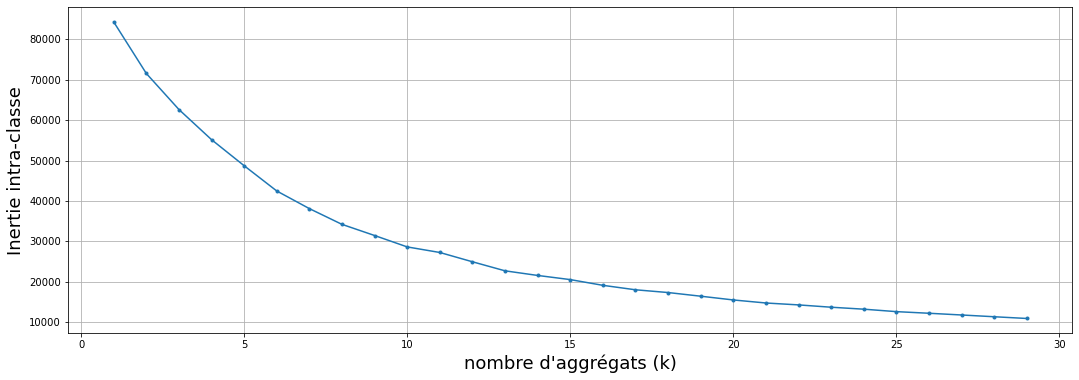

In [119]:
plt.figure(figsize=(18,6))
plt.plot(liste_n_clusters[::-1],inerties_intra[::-1],'.-')
plt.grid()
#plt.xticks(liste_n_clusters[::-1])
#plt.xlim((.5,20.5))
plt.xlabel('''nombre d'aggrégats (k)''',fontsize=18)
plt.ylabel('Inertie intra-classe',fontsize=18) ;

In [120]:
len(liste_n_clusters),len(silhouette_avg)

(29, 28)

Text(0, 0.5, 'Indice de silhouette')

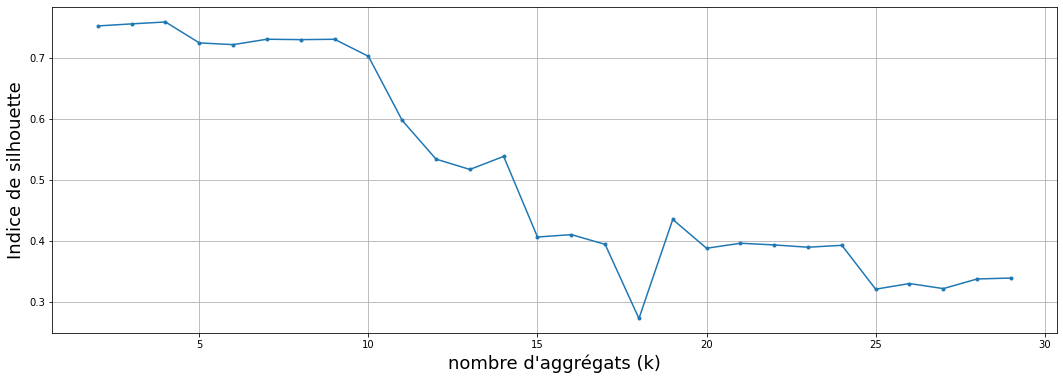

In [121]:
plt.figure(figsize=(18,6))
#plt.plot(liste_n_clusters[-2:0:-1],silhouette_avg[::-1],'.-')
plt.plot(liste_n_clusters[1:],silhouette_avg,'.-')
plt.grid()
#plt.xticks(liste_n_clusters[-2:0:-1])
#plt.xlim((1.5,20.5))
plt.xlabel('''nombre d'aggrégats (k)''',fontsize=18)
plt.ylabel('Indice de silhouette',fontsize=18)

In [122]:
n_essais=20
n_clusters=7
Memory=np.zeros((Data.shape[0],n_essais))
for i in range(n_essais):
    k_means=KMeans(n_clusters)
    k_means.fit(Data)
    Memory[:,i]=k_means.labels_

In [123]:
formes_fortes, unique_counts=np.unique(Memory,axis=0, return_counts=True)
print(formes_fortes)
print(unique_counts)
nombreDeFormesFortes = formes_fortes.shape[0]
nombreDeFormesFortes

[[0. 2. 2. 0. 3. 0. 0. 0. 0. 4. 2. 0. 3. 1. 0. 0. 0. 4. 0. 2.]
 [0. 2. 2. 0. 3. 0. 0. 2. 1. 1. 1. 0. 0. 2. 6. 0. 0. 4. 0. 2.]
 [0. 2. 2. 0. 3. 0. 0. 2. 1. 1. 6. 0. 0. 2. 6. 0. 0. 4. 0. 2.]
 [0. 2. 2. 0. 3. 0. 0. 2. 1. 1. 6. 0. 3. 2. 6. 0. 0. 4. 0. 2.]
 [0. 2. 2. 0. 3. 0. 0. 2. 1. 1. 6. 0. 3. 2. 6. 3. 0. 4. 0. 2.]
 [1. 0. 0. 6. 5. 2. 5. 1. 3. 3. 4. 1. 5. 0. 4. 3. 6. 2. 4. 0.]
 [1. 1. 1. 2. 6. 3. 6. 4. 5. 6. 4. 5. 5. 6. 4. 6. 1. 6. 5. 6.]
 [1. 4. 4. 4. 1. 1. 2. 1. 3. 3. 4. 6. 5. 0. 4. 2. 2. 5. 3. 4.]
 [1. 4. 4. 4. 1. 1. 2. 1. 3. 3. 4. 6. 5. 0. 4. 3. 2. 5. 3. 4.]
 [1. 4. 4. 4. 1. 1. 2. 1. 3. 3. 4. 6. 6. 0. 4. 3. 2. 5. 3. 4.]
 [1. 4. 4. 4. 1. 1. 2. 1. 3. 3. 4. 6. 6. 0. 4. 6. 2. 5. 3. 4.]
 [2. 5. 6. 1. 0. 6. 4. 3. 6. 0. 5. 4. 0. 5. 5. 5. 5. 0. 2. 3.]
 [2. 5. 6. 1. 0. 6. 4. 3. 6. 0. 5. 4. 3. 5. 5. 5. 5. 0. 2. 3.]
 [2. 5. 6. 1. 0. 6. 4. 3. 6. 0. 5. 4. 4. 5. 5. 5. 5. 0. 2. 3.]
 [3. 1. 1. 2. 6. 3. 6. 4. 5. 6. 1. 5. 2. 6. 2. 6. 1. 6. 5. 6.]
 [4. 6. 5. 5. 2. 4. 1. 6. 4. 2. 0. 3. 4. 4. 1. 1. 4. 3.

21

In [147]:
formes_fortes, unique_counts=np.unique(Memory,axis=0, return_counts=True)
nombreDeFormesFortes = formes_fortes.shape[0]
FF = pd.DataFrame(formes_fortes.astype(int),
             index=[ 'FF {} ({:2})'.format(i+1,c) for i,c in enumerate(unique_counts)],
             columns=[str(i) for i in range(n_essais)])
#pd.DataFrame(formes_fortes,columns=[str(i) for i in range(n_essais)])
display(FF)
#display(FF.iloc[[0,6,12,17],:])
np.array(FF.iloc[[0],:])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
FF 1 ( 1),0,2,2,0,3,0,0,0,0,4,2,0,3,1,0,0,0,4,0,2
FF 2 ( 1),0,2,2,0,3,0,0,2,1,1,1,0,0,2,6,0,0,4,0,2
FF 3 (8526),0,2,2,0,3,0,0,2,1,1,6,0,0,2,6,0,0,4,0,2
FF 4 (59),0,2,2,0,3,0,0,2,1,1,6,0,3,2,6,0,0,4,0,2
FF 5 ( 4),0,2,2,0,3,0,0,2,1,1,6,0,3,2,6,3,0,4,0,2
FF 6 ( 4),1,0,0,6,5,2,5,1,3,3,4,1,5,0,4,3,6,2,4,0
FF 7 ( 1),1,1,1,2,6,3,6,4,5,6,4,5,5,6,4,6,1,6,5,6
FF 8 (15),1,4,4,4,1,1,2,1,3,3,4,6,5,0,4,2,2,5,3,4
FF 9 (11),1,4,4,4,1,1,2,1,3,3,4,6,5,0,4,3,2,5,3,4
FF 10 ( 1),1,4,4,4,1,1,2,1,3,3,4,6,6,0,4,3,2,5,3,4


array([[0, 2, 2, 0, 3, 0, 0, 0, 0, 4, 2, 0, 3, 1, 0, 0, 0, 4, 0, 2]])

In [125]:
k_means=KMeans(n_clusters=7)
k_means.fit(Data)
y_pred = k_means.fit_predict(Data)

In [126]:
L=[[]for i in range (7)]
for i,c in enumerate (y_pred):
    L[c].append(np.array(Data.iloc[i,:]))

for i in range(7):               
    #print(len(L[i]),type(L[i]),L[i][0])
    df_0 = pd.DataFrame(L[i],columns = pigments)
    display(df_0.describe().iloc[[0,1,2],:])

,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,8593.00000,8593.00000,8593.00000,8593.00000,8593.00000,8593.00000,8593.00000,8593.00000,8593.00000,8593.00000
mean,-0.20688,-0.13600,-0.07663,-0.05087,-0.07845,-0.08301,-0.16301,-0.07332,-0.12400,-0.08785
std,0.32654,0.42516,0.36095,0.31708,0.33018,0.38343,0.30409,0.20209,0.38148,0.40314


,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000,30.00000
mean,6.60975,0.04753,9.20302,0.08480,-0.13005,-0.02105,1.23575,12.31685,1.93566,1.33272
std,2.48059,1.24771,11.03670,0.66464,0.22845,0.27895,0.58275,9.32096,1.14368,1.38150


,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,65.00000,65.00000,65.00000,65.00000,65.00000,65.00000,65.00000,65.00000,65.00000,65.00000
mean,0.88534,-0.31575,0.23057,-0.07673,10.46389,0.23171,0.22326,-0.11752,0.89490,-0.11028
std,0.68062,0.06141,0.40778,0.18580,3.85847,0.32625,0.28421,0.03611,0.85592,0.20761


,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,121.00000,121.000,121.00000,121.00000,121.00000,121.00000,121.00000,121.00000,121.00000,121.00000
mean,0.32406,0.189,0.08259,5.53074,0.01694,6.65505,0.74352,0.19996,-0.05573,-0.20305
std,2.27067,0.223,0.35242,3.23488,0.28393,4.65734,3.05497,0.18798,0.34856,0.37600


,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,132.00000,132.00000,132.00000,132.00000,132.00000,132.00000,132.00000,132.00000,132.00000,132.00000
mean,1.13218,-0.22585,0.29233,0.05132,0.21696,-0.05322,-0.02937,-0.06326,6.23403,-0.07836
std,1.05700,0.14127,0.75120,0.47516,1.55818,0.35210,0.56164,0.45242,3.49554,0.59358


,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,88.00000,88.00000,88.00000,88.00000,88.00000,88.00000,88.00000,88.00000,88.00000,88.00000
mean,0.80193,2.24862,1.00670,0.49820,-0.16530,-0.18960,-0.02344,0.38292,0.61133,8.31014
std,0.82347,6.33214,1.12082,0.70836,0.12409,0.32899,0.19268,1.59245,1.63158,2.87365


,"Chlorophyll a, total",Divinyl chlorophyll a,Chlorophyll b,Divinyl chlorophyll b,19-Hexanoyloxyfucoxanthin,19-Butanoyloxyfucoxanthin,Fucoxanthin,Peridinin,Alloxanthin,Zeaxanthin
count,414.00000,414.00000,414.00000,414.00000,414.00000,414.00000,414.00000,414.00000,414.00000,414.00000
mean,3.08450,-0.28648,0.89684,0.15914,-0.04908,-0.15860,2.94225,0.64087,0.35633,-0.02170
std,1.98175,0.26984,1.38214,0.90340,0.30688,0.42226,2.86018,1.29362,0.68476,0.65582


# 5.2. K-Means - CAH - K-Means

In [127]:
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [128]:
df_global_data_imputed.head()
len(df_global_data_imputed)

9443

### 1er K-Means

Pour simplifier la classification hiérarchique, on va d'abord réaliser une première classification par K-moyennes avec un nombre de clusters élevé. Ces clusters seront ensuite les éléments initiaux de la CAH.

In [129]:
n_clusters = 100
k_means=KMeans(n_clusters=n_clusters, max_iter=10)
k_means.fit(df_global_data_imputed)

KMeans(max_iter=10, n_clusters=100)

In [130]:
classes_ind_1 = k_means.fit_predict(df_global_data_imputed)
classes_ind_1

array([21, 94, 94, ..., 49, 78, 20])

(array([6.320e+02, 2.600e+01, 1.000e+01, 1.800e+01, 1.400e+01, 1.000e+01, 2.000e+00, 4.000e+00, 2.000e+00, 4.000e+01, 9.000e+00, 1.700e+01, 9.000e+00, 7.000e+00, 1.500e+01, 6.000e+00, 1.000e+00, 2.000e+01, 2.500e+01,
        2.960e+02, 1.370e+02, 1.200e+01, 5.200e+01, 3.100e+01, 1.000e+01, 1.000e+00, 2.900e+01, 2.800e+01, 8.000e+00, 8.000e+00, 1.000e+00, 1.830e+02, 1.000e+00, 1.000e+00, 6.200e+01, 2.000e+01, 1.500e+01, 9.300e+01,
        1.000e+00, 5.000e+00, 5.840e+02, 1.000e+00, 2.000e+00, 3.200e+01, 2.800e+02, 3.200e+01, 6.000e+00, 2.000e+00, 2.412e+03, 2.000e+00, 7.600e+01, 1.310e+02, 2.100e+01, 1.300e+01, 5.000e+01, 2.300e+01, 5.000e+00,
        3.000e+01, 2.000e+01, 2.200e+01, 6.200e+01, 9.900e+01, 2.000e+00, 8.000e+00, 4.570e+02, 2.000e+01, 1.000e+00, 4.100e+01, 7.000e+00, 1.000e+00, 2.000e+01, 1.000e+00, 5.000e+00, 1.150e+02, 1.800e+01, 1.180e+02,
        2.000e+00, 1.172e+03, 1.100e+01, 1.320e+02, 7.000e+00, 2.200e+01, 3.000e+00, 8.090e+02, 1.770e+02, 4.500e+01, 2.300e+01, 1.7

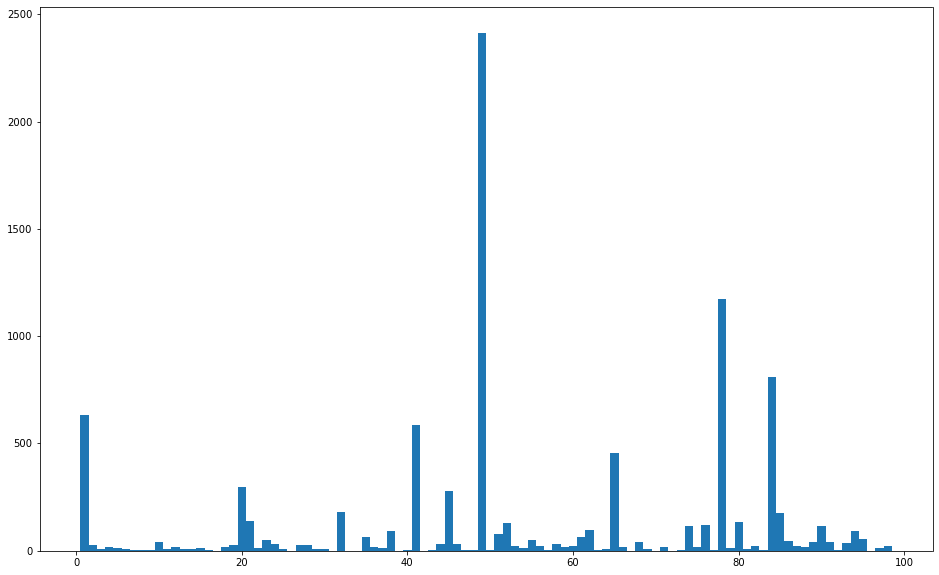

In [131]:
fig = plt.figure(figsize=(16,10))
bins = [x + 0.5 for x in range(0, 99)]
plt.hist(classes_ind_1, range = (0, 99), bins = bins)

In [132]:
len(k_means.cluster_centers_[:,0]),len(k_means.cluster_centers_[0,:])

(100, 10)

### CAH

In [134]:
centres_clusters_1 = k_means.cluster_centers_
pd.DataFrame(centres_clusters_1)

,0,1,2,3,4,5,6,7,8,9
0,0.18332,0.21946,0.11859,0.41153,-0.21112,-0.17309,-0.08122,0.05880,0.22430,5.05791
1,-0.25167,-0.29837,-0.17630,-0.14422,-0.11344,-0.18705,-0.18498,-0.09389,-0.08588,-0.29795
2,0.75333,-0.30269,0.03155,-0.01604,0.12001,0.09126,3.13048,0.15440,-0.00893,-0.23543
3,3.22668,-0.35751,1.82543,-0.16309,-0.25958,-0.32533,0.90794,4.71258,0.46461,-0.00792
4,0.18986,0.18375,0.07115,5.87645,-0.06165,11.07167,0.87262,0.33784,-0.19550,-0.30456
5,1.64465,-0.26846,0.40627,-0.02818,-0.10271,-0.04953,-0.17980,-0.08541,11.80021,-0.18371
6,1.22549,-0.31673,0.84044,0.22792,17.25998,0.58749,0.56757,-0.12696,2.08093,0.08168
7,0.19787,15.39379,0.42320,2.42175,0.07476,0.21177,-0.21811,-0.04559,-0.21785,5.85604
8,10.59784,-0.35751,9.19203,-0.16309,-0.06122,0.33304,1.44054,23.89759,3.78376,3.10142
9,3.60245,4.18741,42.74691,2.11475,-0.25972,0.13552,1.02740,0.05270,-0.29348,0.90296


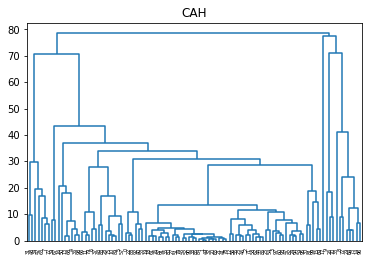

In [135]:
Z = linkage(centres_clusters_1,method='ward',metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
dendrogram(Z,orientation='top',color_threshold=0)
plt.show()

In [136]:
classes_ind_2 = AgglomerativeClustering(n_clusters = 4).fit_predict(centres_clusters_1)
classes_ind_2

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [137]:
Classes_ind_Means_CAH = [0 for k in range (len(classes_ind_1))]
print(len(Classes_ind_Means_CAH))
for centres,classes in enumerate(classes_ind_2):
    for i in range (len(classes_ind_1)):
        x = classes_ind_1[i]
        if x == centres :
            Classes_ind_Means_CAH[i] = classes

print(Classes_ind_Means_CAH[:100])

9443
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


(array([35.,  1.,  4.,  0.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5]),
 <BarContainer object of 4 artists>)

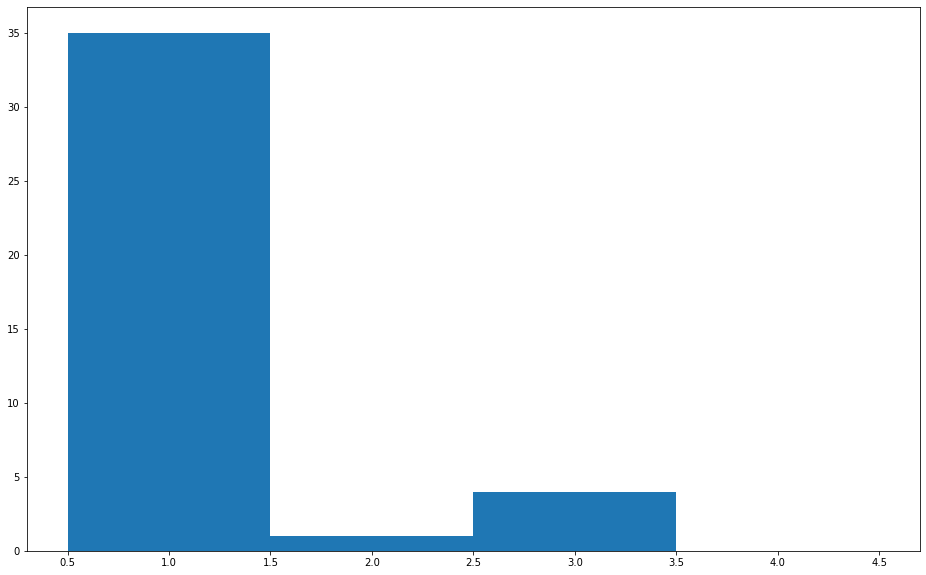

In [138]:
fig = plt.figure(figsize=(16,10))
bins = [x + 0.5 for x in range(0, 5)]
plt.hist(Classes_ind_Means_CAH, range = (0, 5), bins = bins)

In [139]:


n_clusters = 100
k_means=KMeans(n_clusters=n_clusters, max_iter=10,init = ())
k_means.fit(df_global_data_imputed)



ValueError: init should be either 'k-means++', 'random', a ndarray or a callable, got '()' instead.